In [1]:
%pip install -U seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 363.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 599.1 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 983.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 909.5 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -U matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 262.6 kB/s eta 0:00:31
   ---------------------------------------- 0.1/8.0 MB 459.5 kB/s eta 0:00:18
    --------------------------------------- 0.2/8.0 MB 807.1 kB/s eta 0:00:10
   - -------------------------------------- 0.3/8.0 MB 1.0 MB/s eta 0:00:08
   - -------------------------------------- 0.4/8.0 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.7/8.0 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.2/8.0 MB 2.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/8.0 MB 2.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/8.0 MB 2.7 MB/s eta 0:00:03
   ------ -----------------------

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading the datase

In [3]:
path=r"C:\Users\Atish\Downloads\laptopPrice.csv"
df=pd.read_csv(path)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Step 2: Perform Basic Data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [6]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [8]:
df.duplicated().sum()

21

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(802, 19)

### Step 3: Descriptive analytic

In [14]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [15]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [7]:
cat=list(df.columns[df.dtypes=='object'])
con=list(df.columns[df.dtypes!='object'])

In [18]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

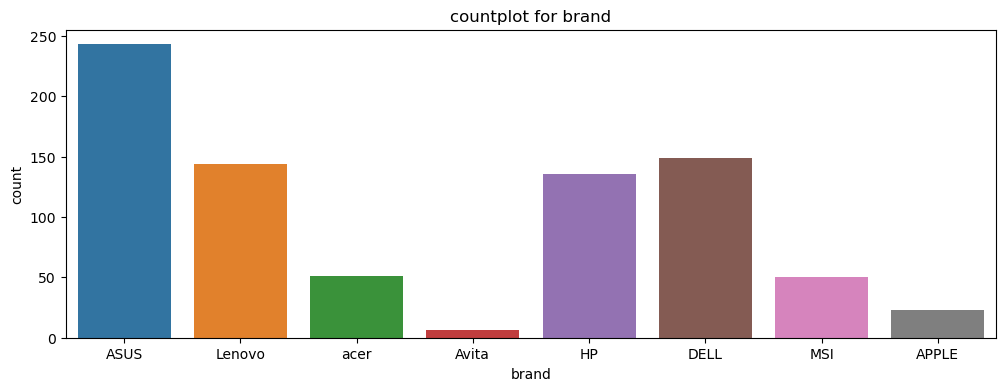

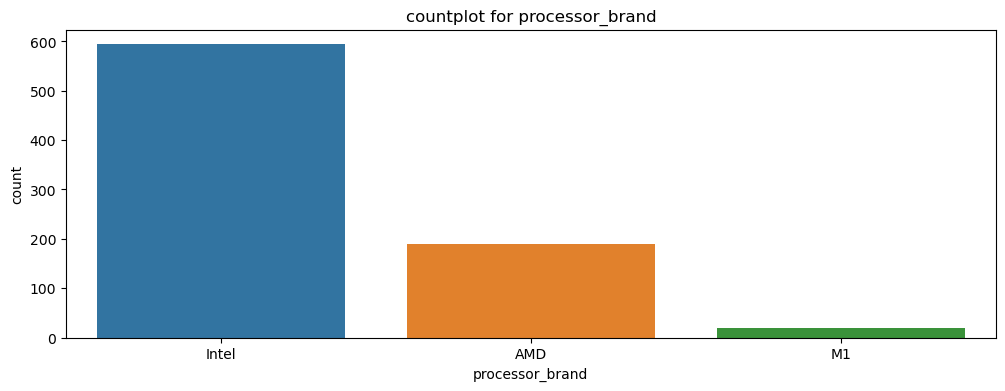

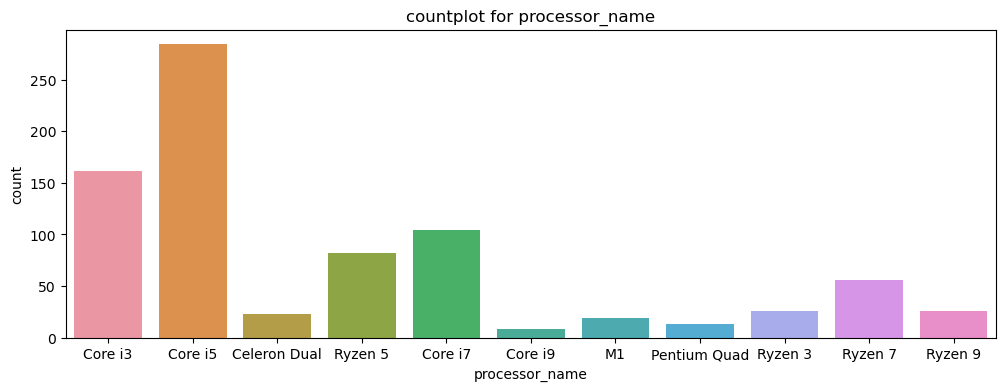

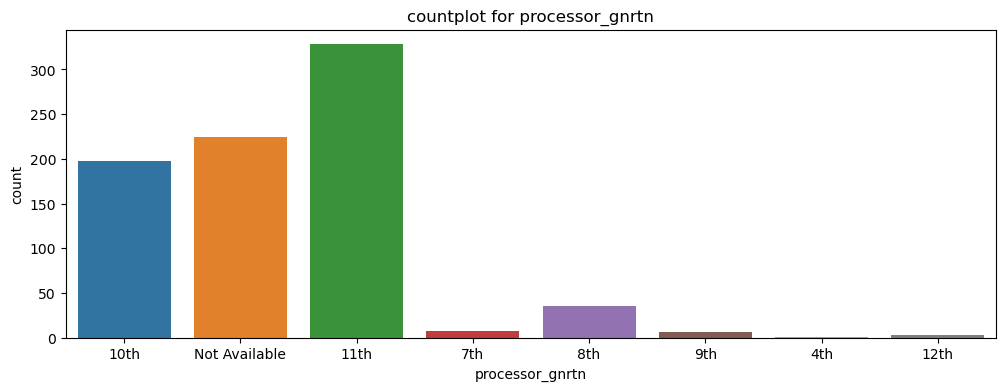

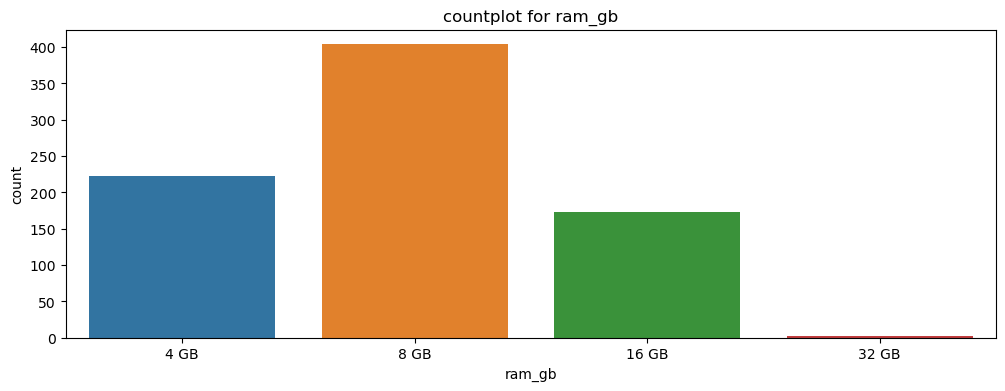

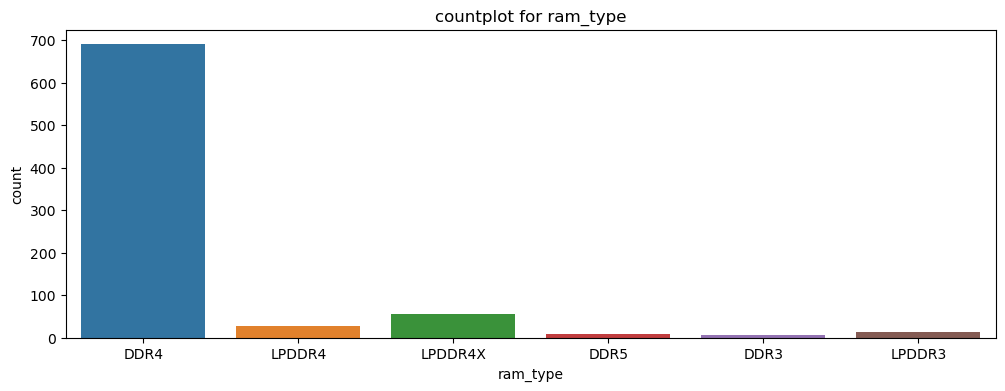

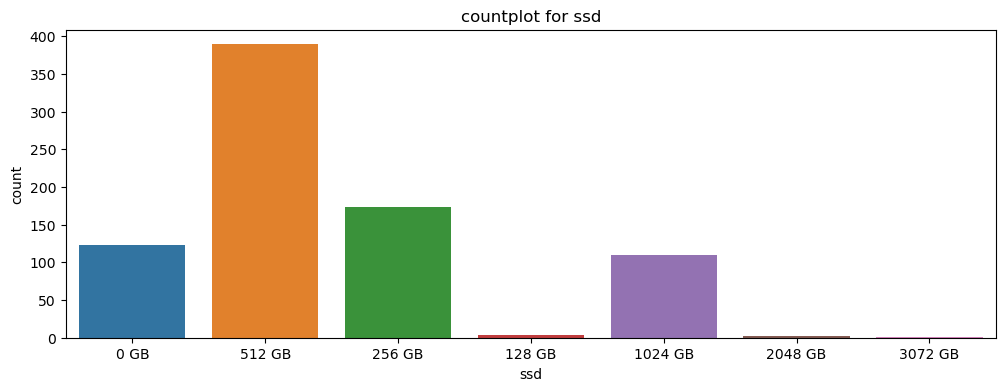

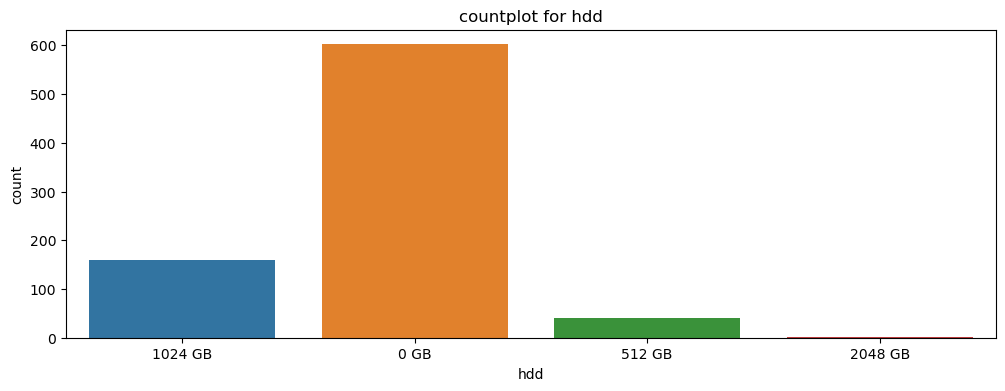

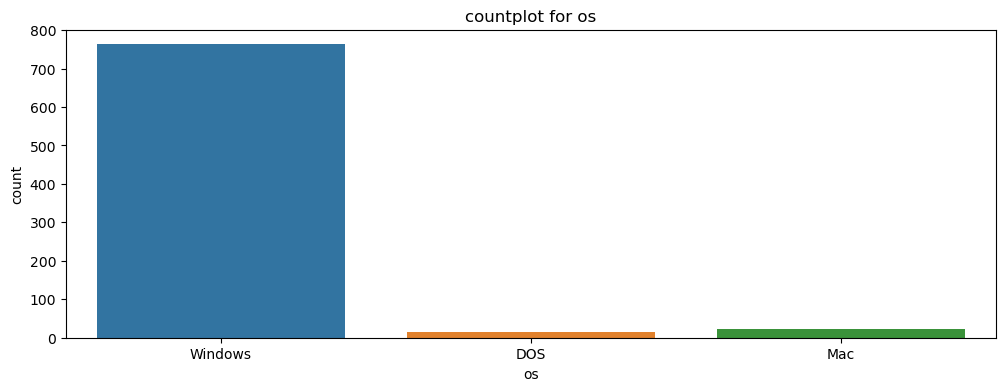

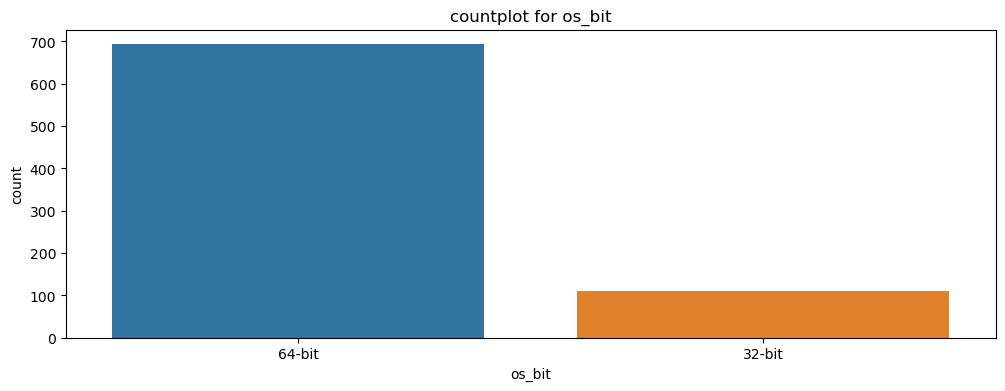

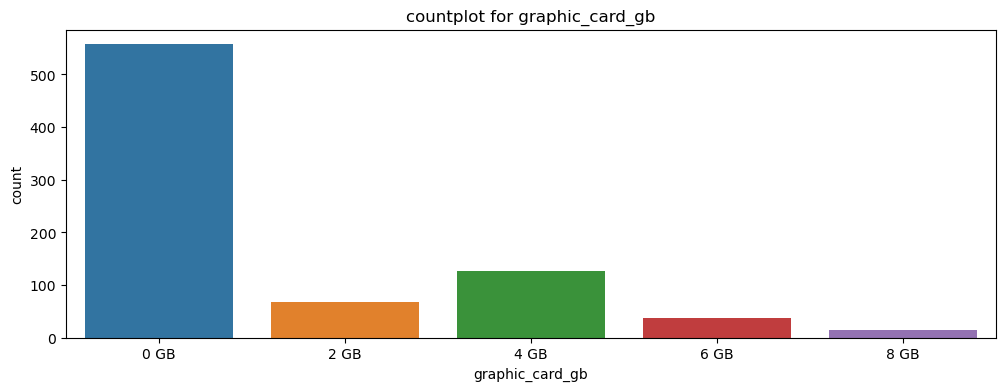

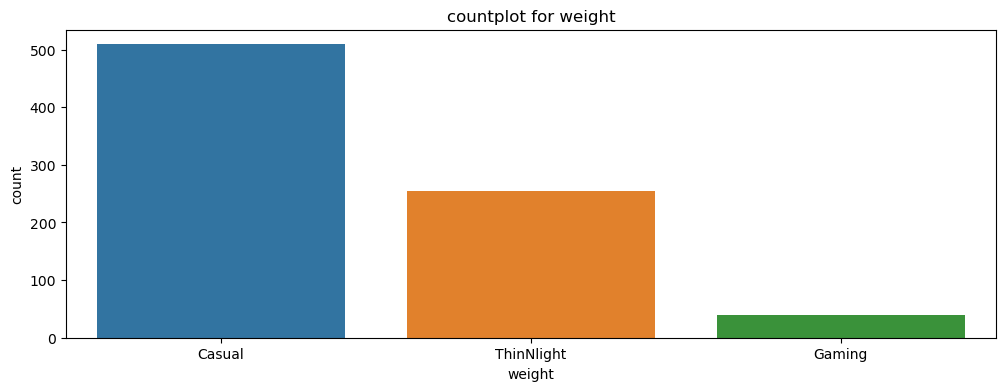

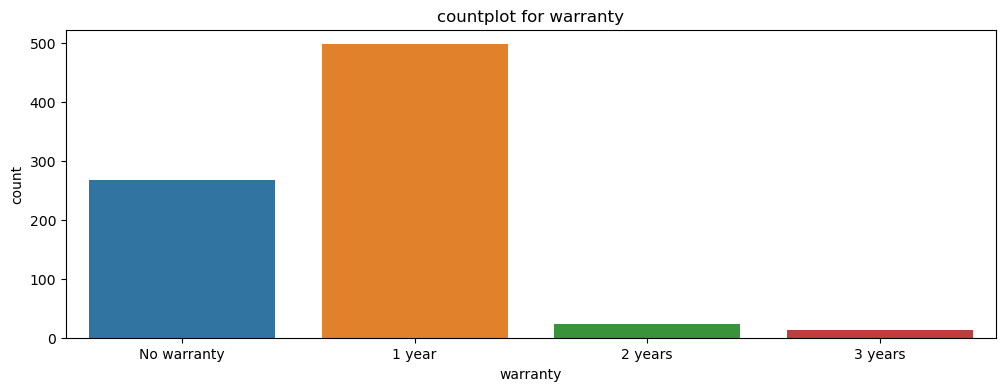

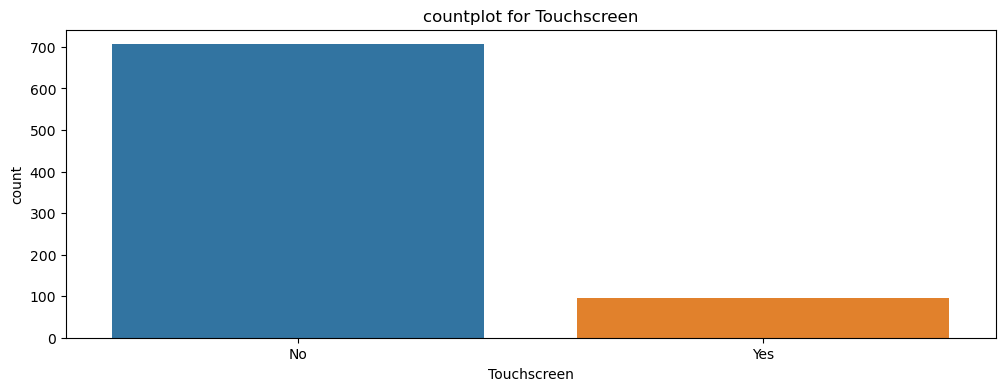

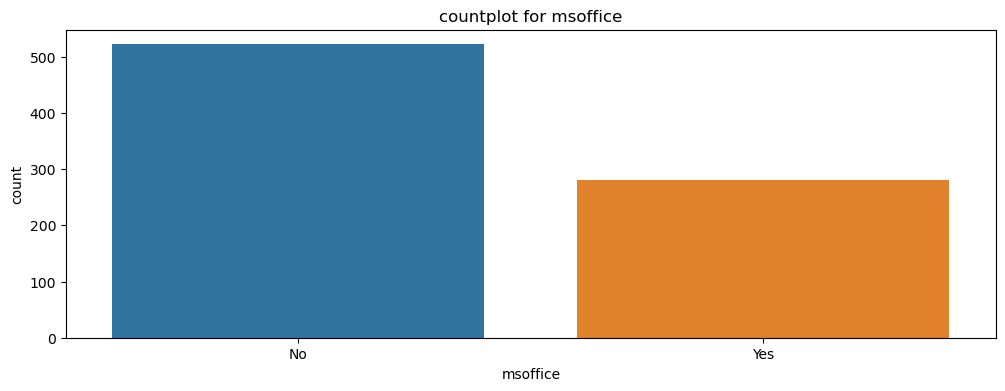

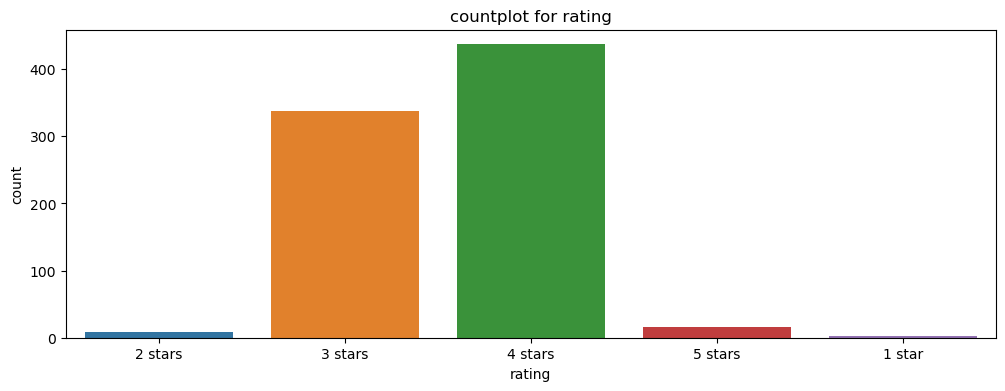

In [24]:
for i in cat:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df,x=i)
    plt.title(f'countplot for {i}')
    plt.show()

In [25]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

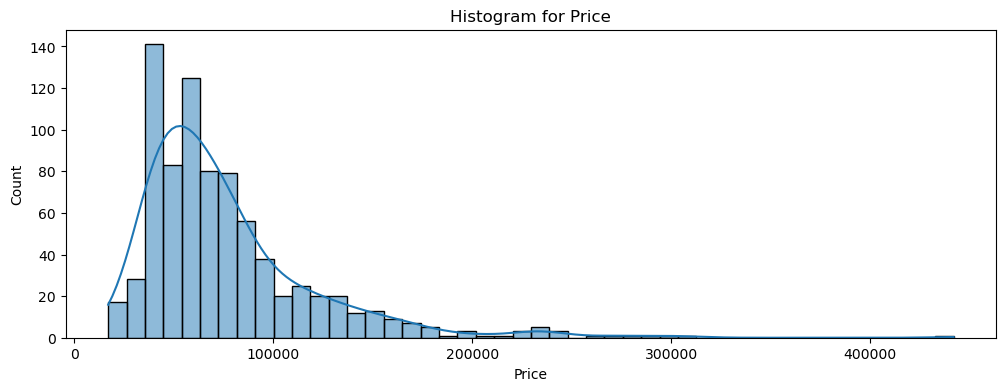

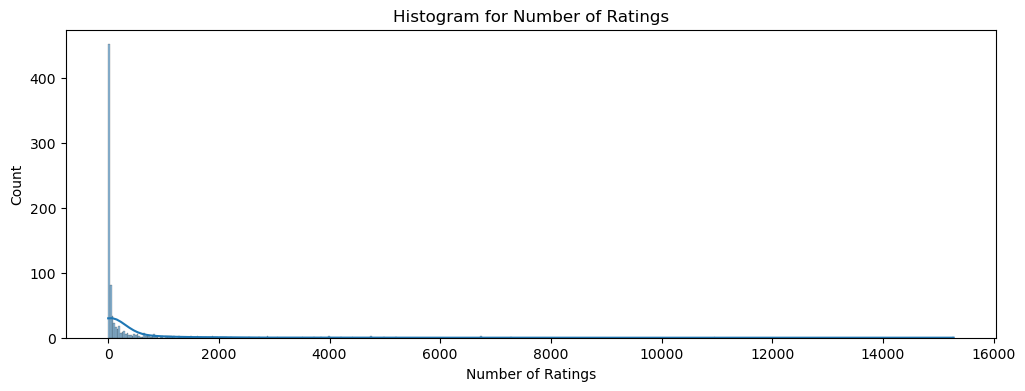

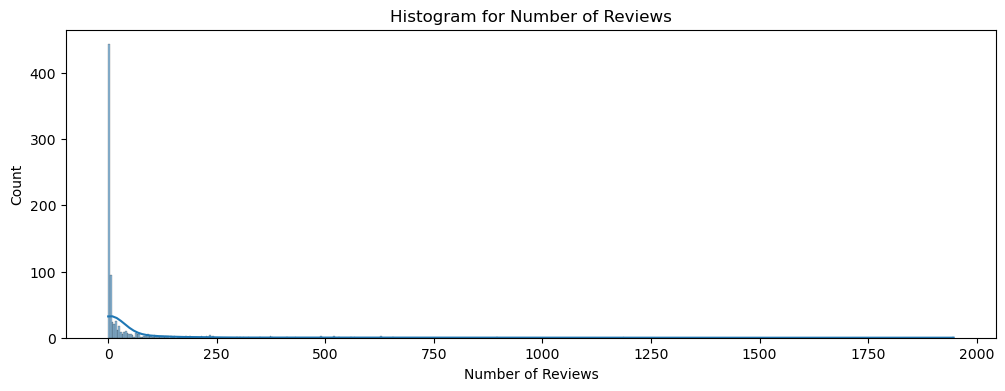

In [27]:
for i in con:
    plt.figure(figsize=(12,4))
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()          

In [5]:
sns.__version__

'0.13.2'

### Bivariate - 2 features analysis
1 con vs con - Scatterplot

2 cat vs con - Boxplot

3 cat vs cat - Crosstab heatmap


In [8]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

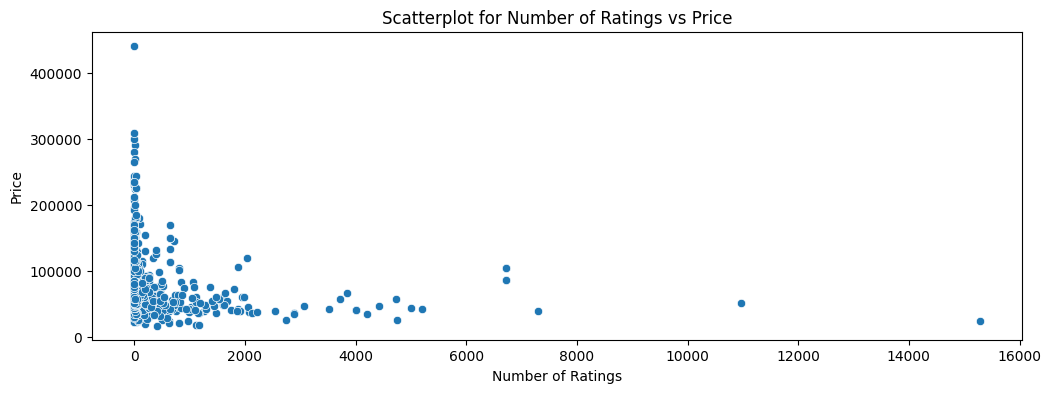

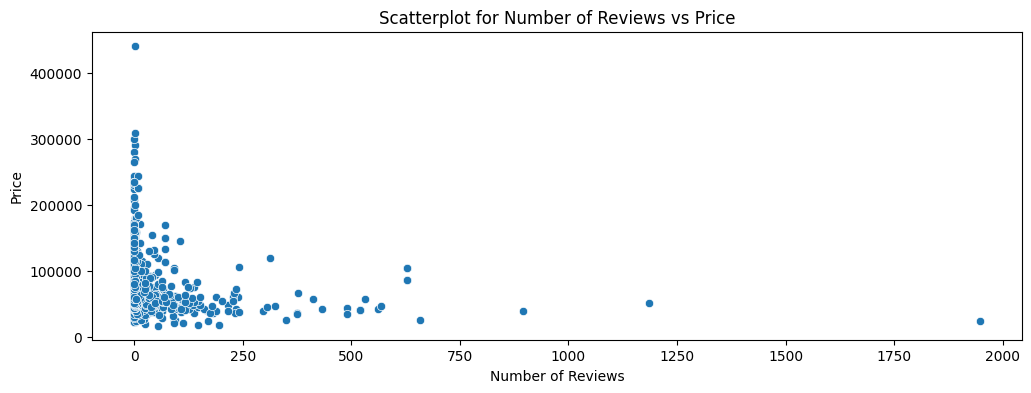

In [14]:
for i in con:
    if i!='Price':
        plt.figure(figsize=(12,4))
        sns.scatterplot(data=df,x=i,y='Price')
        plt.title(f'Scatterplot for {i} vs Price')
        plt.show()

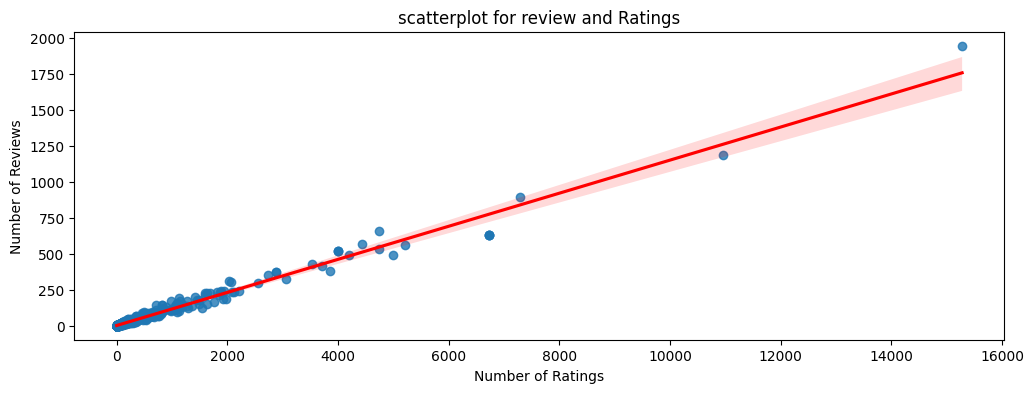

In [19]:
plt.figure(figsize=(12,4))
sns.regplot(data=df,x='Number of Ratings',y='Number of Reviews',
           line_kws={'color':'red'})
plt.title(f'scatterplot for review and Ratings')
plt.show()

### Cat vs con , boxplot

In [20]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [21]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

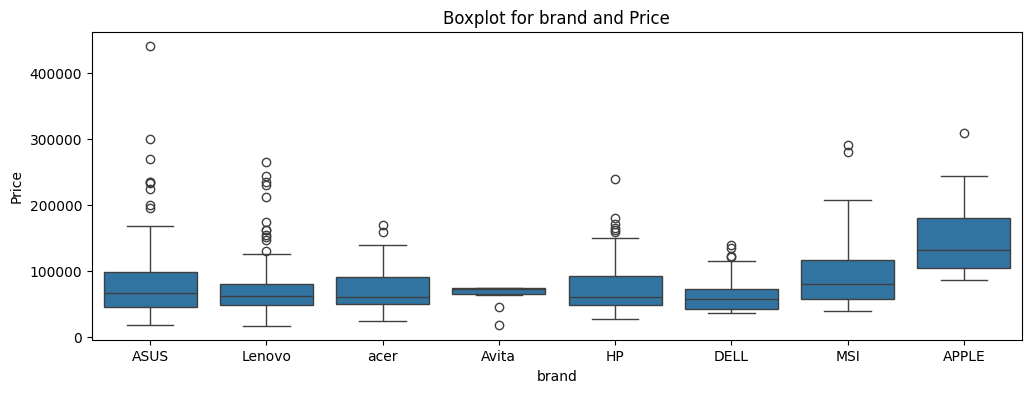

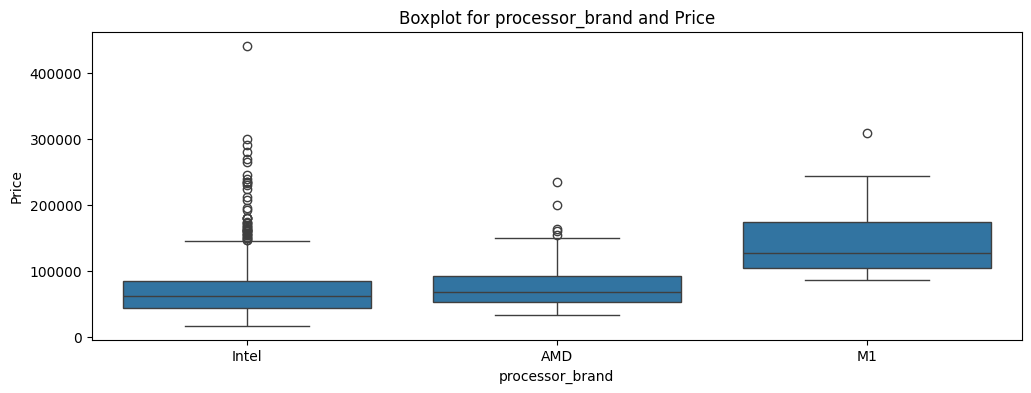

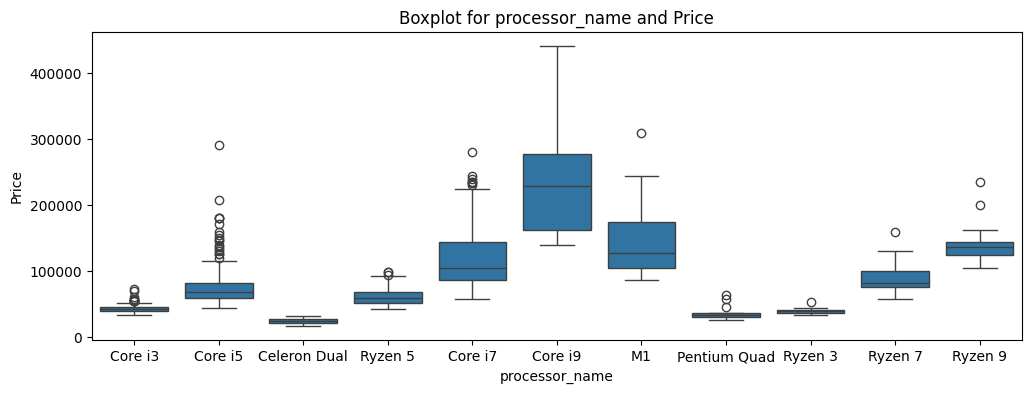

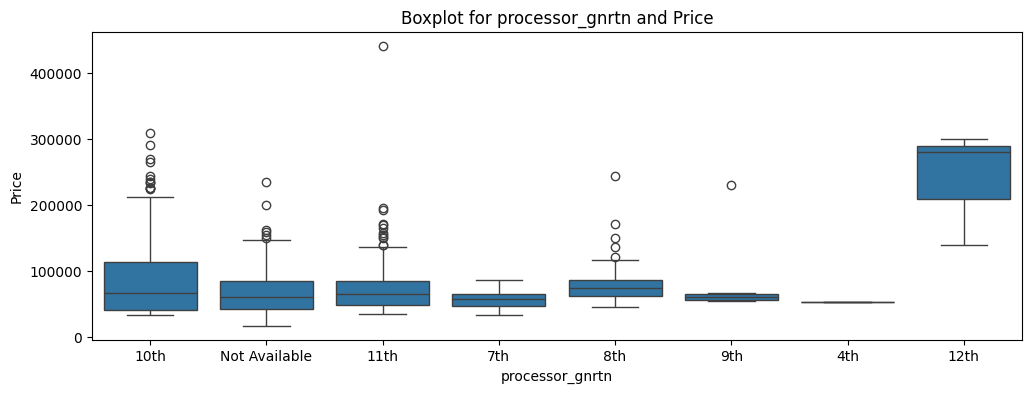

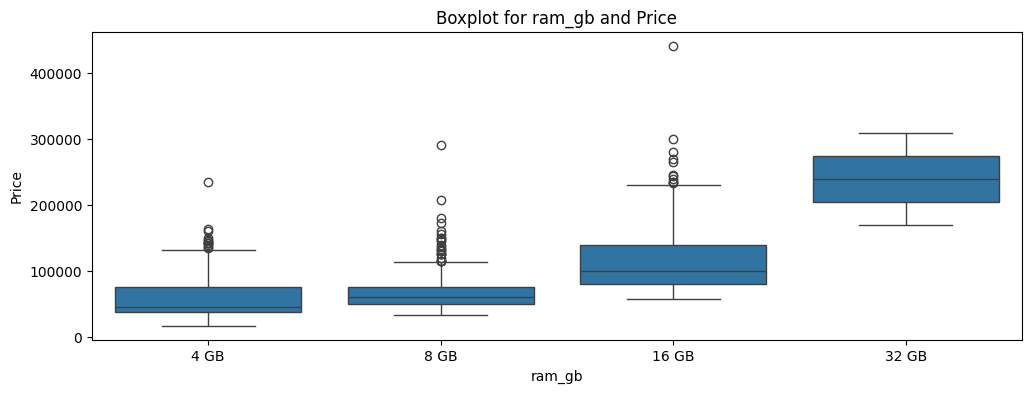

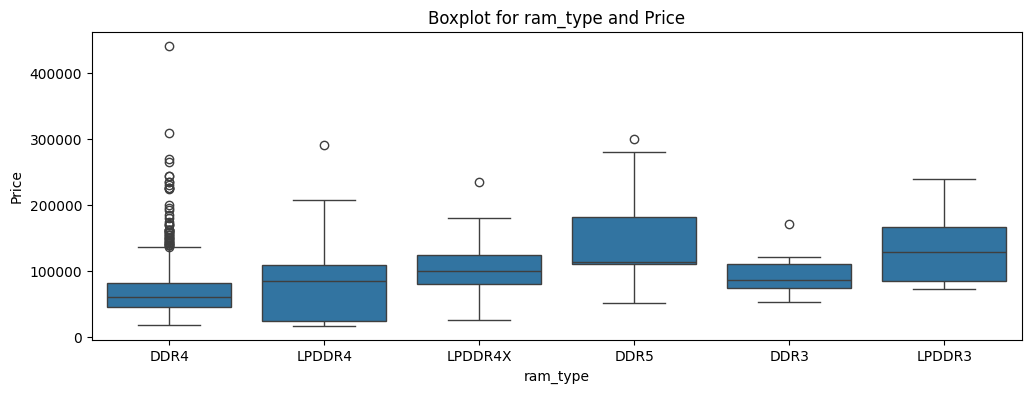

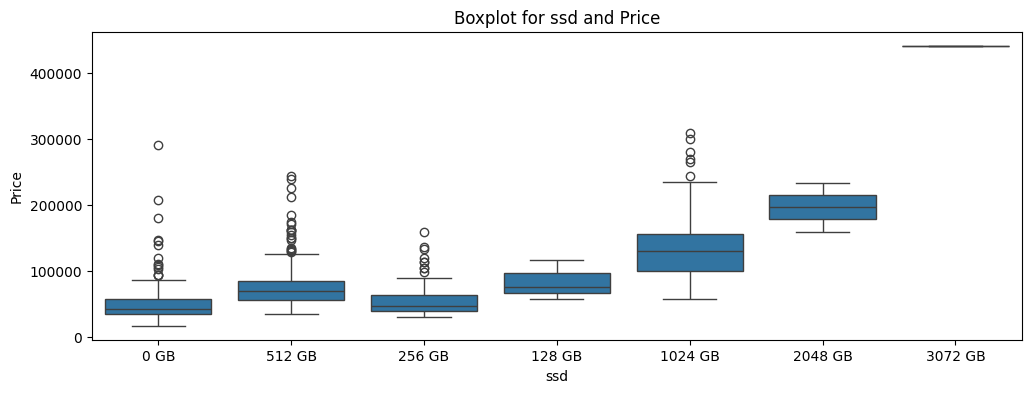

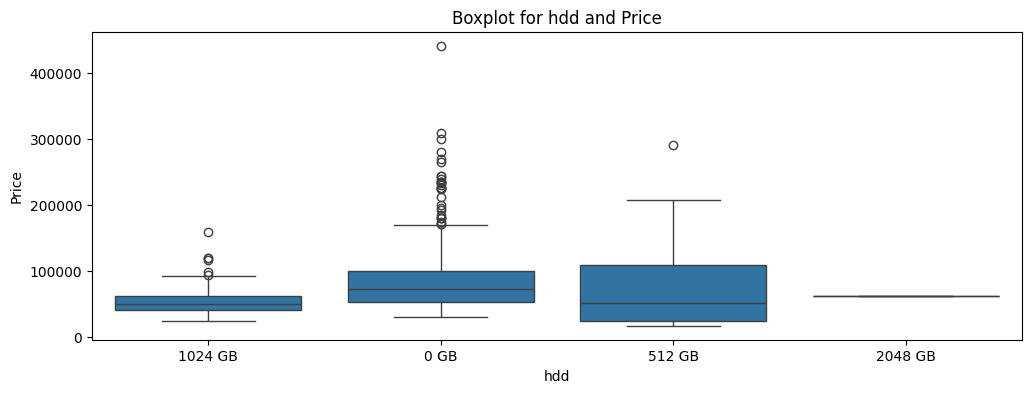

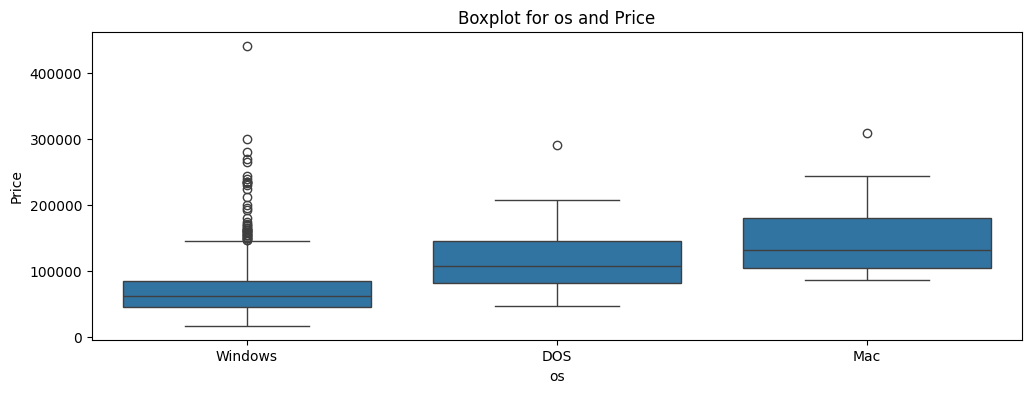

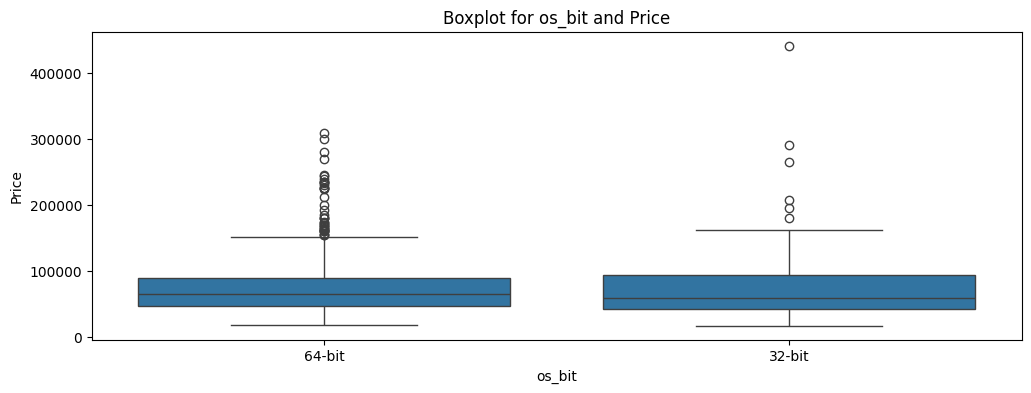

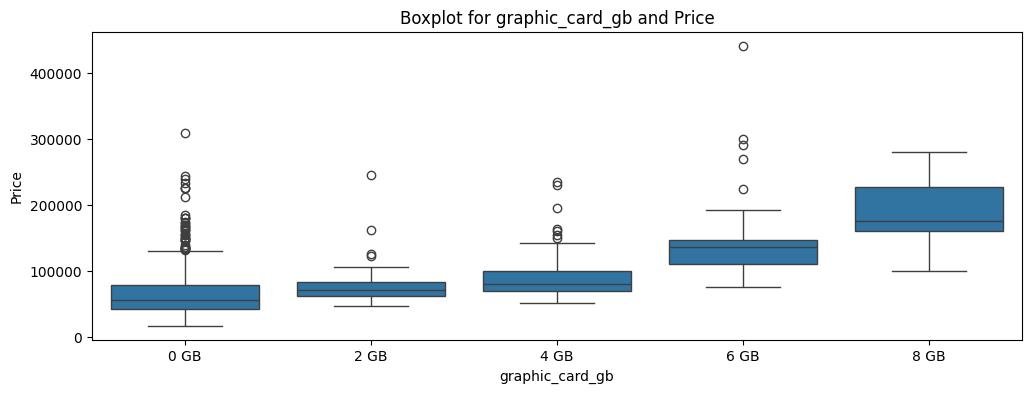

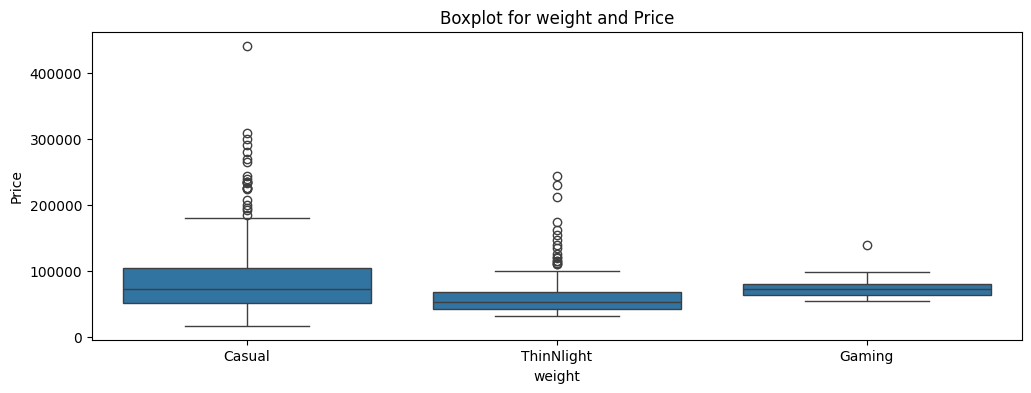

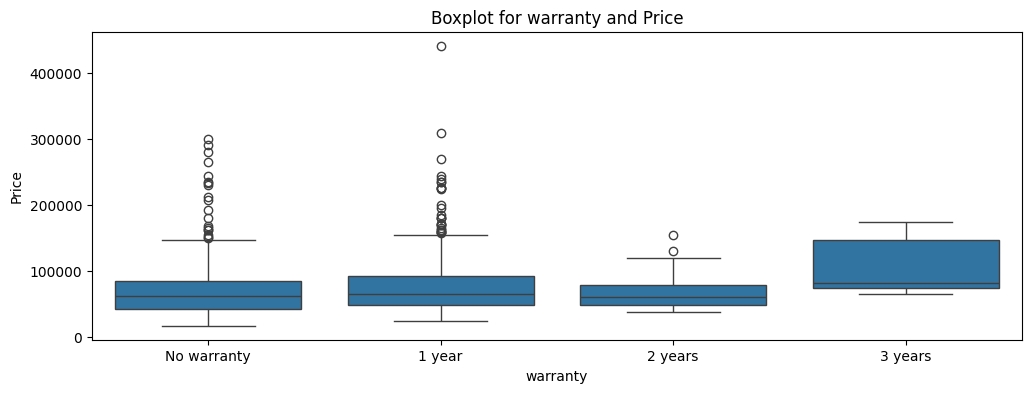

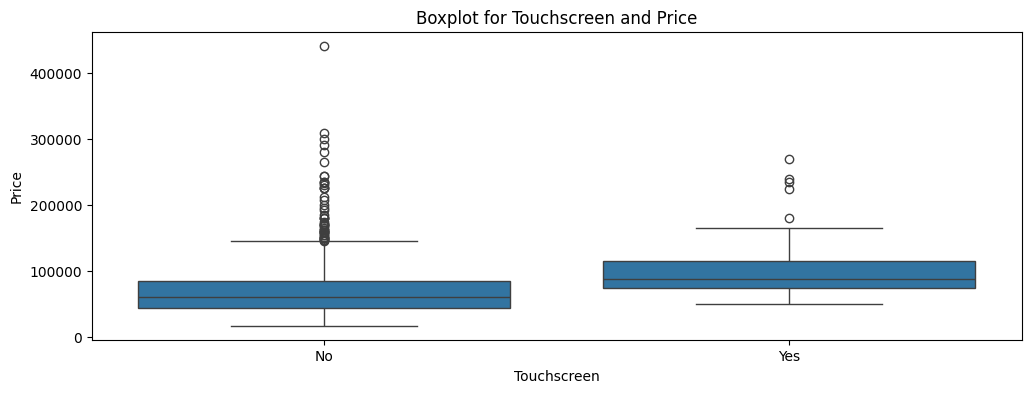

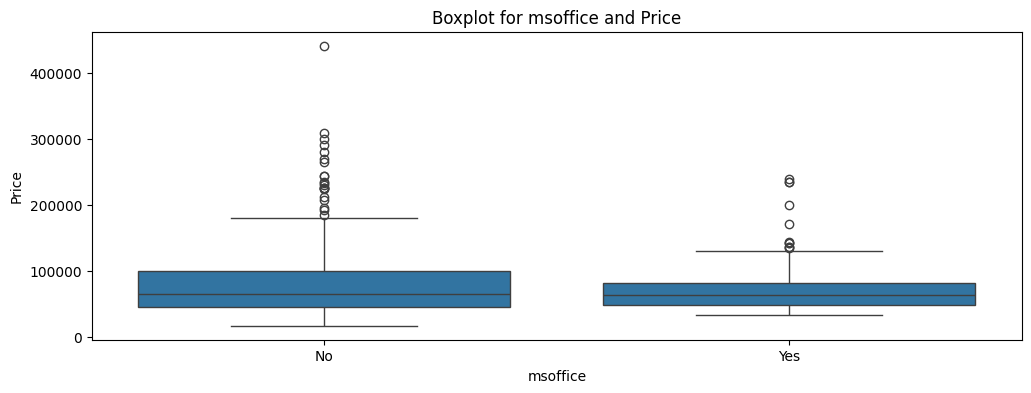

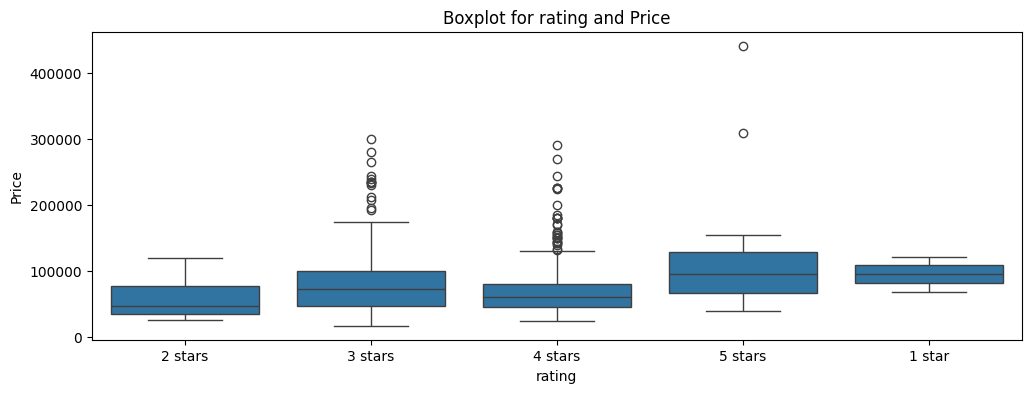

In [26]:
for i in cat:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=df,x=i,y='Price')
    plt.title(f'Boxplot for {i} and Price')
    plt.show()

### Cat vs Cat - Crosstab heatmap

In [31]:
ctab1=pd.crosstab(df['brand'], df['processor_brand'])
ctab1

processor_brand,AMD,Intel,M1
brand,,,
APPLE,0,4,24
ASUS,66,183,0
Avita,0,14,0
DELL,31,120,0
HP,44,92,0
Lenovo,26,118,0
MSI,7,43,0
acer,15,36,0


<Axes: xlabel='processor_brand', ylabel='brand'>

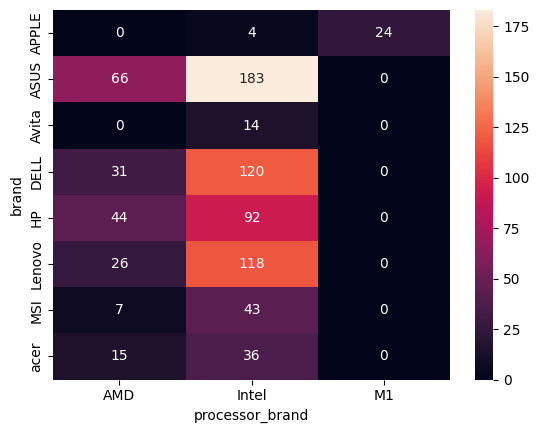

In [33]:
sns.heatmap(data=ctab1,annot= True,fmt='d')

In [34]:
ctab2=pd.crosstab(df['ram_gb'],df['graphic_card_gb'])
ctab2

graphic_card_gb,0 GB,2 GB,4 GB,6 GB,8 GB
ram_gb,,,,,
16 GB,90,17,36,25,9
32 GB,1,0,0,0,1
4 GB,187,1,30,6,2
8 GB,299,49,62,6,2


<Axes: xlabel='graphic_card_gb', ylabel='ram_gb'>

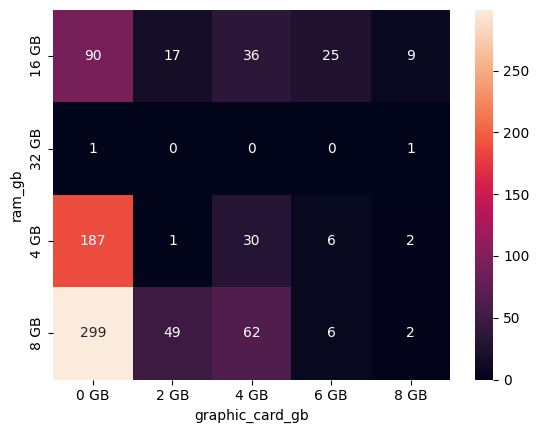

In [36]:
sns.heatmap(data=ctab2, annot=True,fmt='d')

### Multivariate anslysis 3 or more than 3

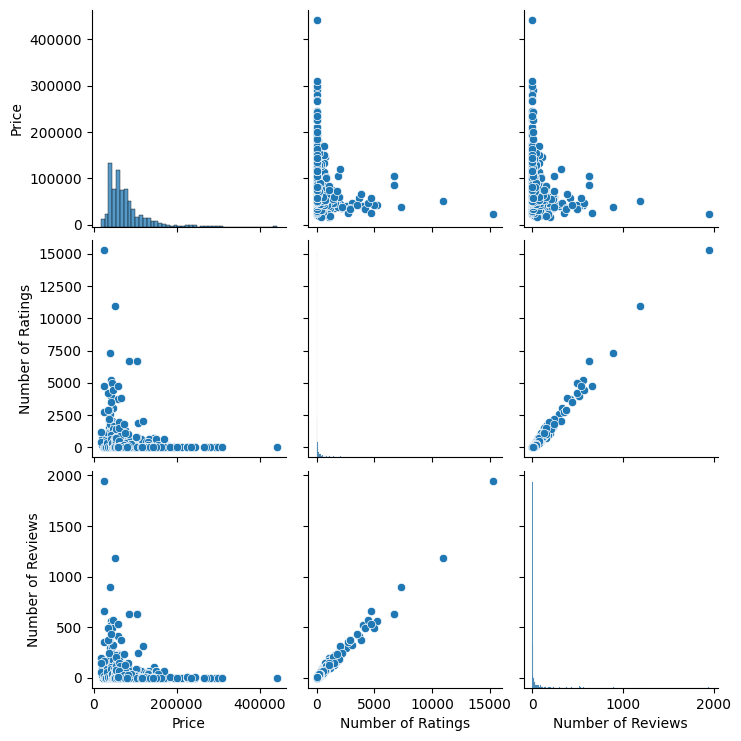

In [37]:
sns.pairplot(df)

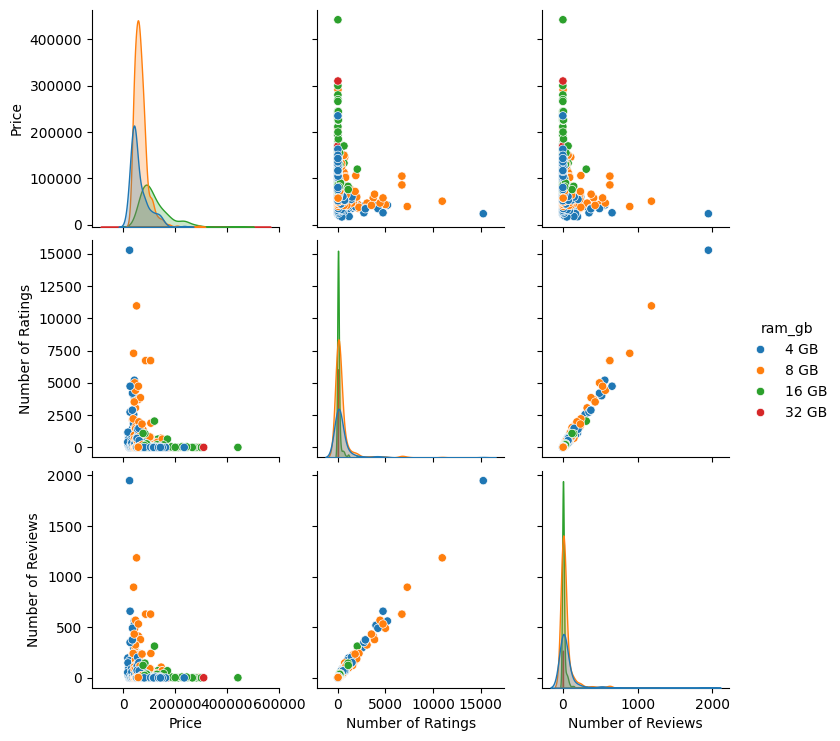

In [38]:
sns.pairplot(df,hue='ram_gb')

In [41]:
c=df.corr(numeric_only=True)
c

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.140392,-0.148738
Number of Ratings,-0.140392,1.000000,0.989626
Number of Reviews,-0.148738,0.989626,1.000000


<Axes: >

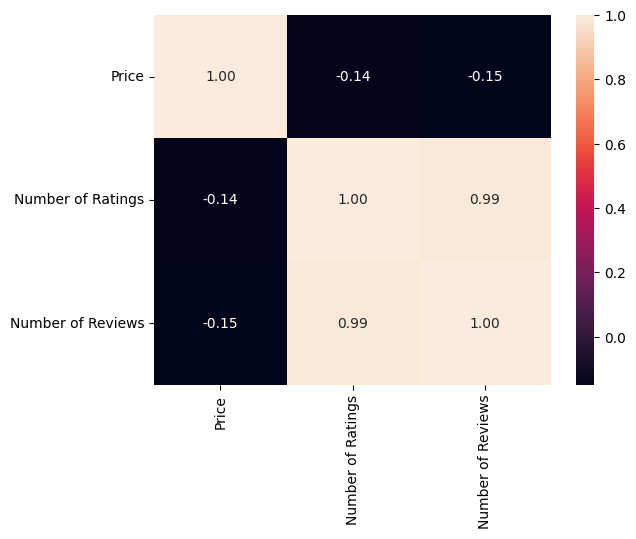

In [43]:
sns.heatmap(data=c,annot=True,fmt='.2f')

### Get the average price by Brand

In [54]:
c=df.groupby(by='brand',).agg({'Price':'mean'})
c

,Price
brand,
APPLE,151707.857143
ASUS,78937.602410
Avita,65157.428571
DELL,60934.662252
HP,73640.272059
Lenovo,72920.208333
MSI,98713.020000
acer,72420.039216


<Axes: title={'center': 'Average Price by Brand'}, xlabel='brand'>

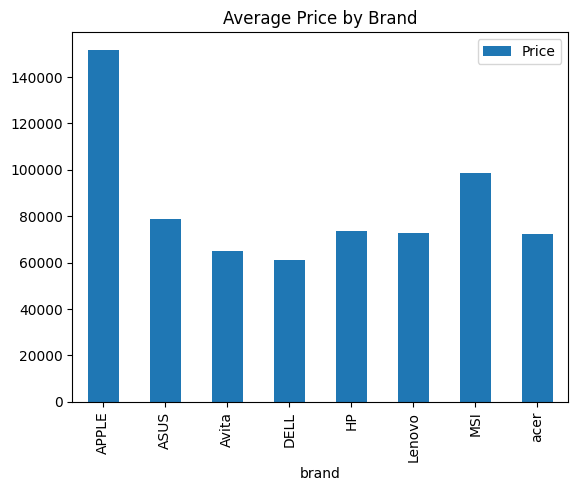

In [57]:
c.plot(kind='bar',title='Average Price by Brand')